In [1]:
import pandas as pd
import math
%pylab inline

def u(x):
    return x**2+1

def f(x):
    return 2*(x**2 * math.tanh(x) - x/((math.cosh(x))**2) - 1)

def F(x,h):
    return h*(f(x+h/2) + f(x-h/2))/2

def q(x):
    return 2*math.tanh(x)

def p(x):
    return math.tanh(x) + 1 

Populating the interactive namespace from numpy and matplotlib


# Доп задача 

In [10]:
import pandas as pd
import math
%pylab inline

def u(x):
    return x**2+1

def f(x):
    return 2*(x**2 * math.tanh(x) - x/((math.cosh(x))**2) - 1)

def F(x,h):
    return h*(f(x+h/2) + f(x-h/2))/2

def q(x):
    return 2*math.tanh(x)

def p(x):
    #if x<1:
    return math.tanh(x) + 1 
    #else:
     #   return math.tanh(x) + 10

Populating the interactive namespace from numpy and matplotlib


C:\Users\79266\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning:

pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy



### Аналитическое решение

In [11]:
a = 0
b = 2
h = 0.005
list_1 = []
list_2 = arange(a,b+h,h)
for i in arange(a,b+h,h):
    list_1.append(u(i))

### Численное решение

In [12]:
matrix_1 = np.zeros((len(list_2)))
matrix_1[0] = 1
matrix_1[-1] = 5

In [13]:
list_F = [-F(x,h) for x in list_2[1:-1]]
list_a = [p(x-1/2*h)/h - h/6 * q(x-1/2*h) for x in list_2[1:-1]]
list_b = [1/h * (p(x+1/2*h) + p(x-1/2*h)) + 1/3 * h *(q(x+1/2*h) + q(x-1/2*h)) for x in list_2[1:-1]]
list_c = [p(x+1/2*h)/h - h/6 * q(x+1/2*h) for x in list_2[1:-1]]

In [14]:
list_F_ans = list_F
list_F_ans[0] = list_F_ans[0] - list_a[0] * matrix_1[0]
list_F_ans[-1] = list_F_ans[-1] - matrix_1[-1] * list_c[-1]

In [15]:
matrix_g = np.zeros((len(list_2)-2, len(list_2)-2))

matrix_g[0][0] = -list_b[0]
matrix_g[0][1] = list_c[0]

for s in range(1,matrix_g.shape[0]):
    if s!=matrix_g.shape[0]-1:
        j = s
        matrix_g[s][j] = -list_b[s]
        matrix_g[s][j+1] = list_c[s]
        matrix_g[s][j-1] = list_a[s]
    
matrix_g[-1][-1] = -list_b[-1]
matrix_g[-1][-2] = list_a[-1]

In [16]:
m = np.linalg.solve(matrix_g, list_F_ans)
m = np.append(m,matrix_1[-1])
m = np.append(matrix_1[0],m)

In [17]:
import plotly.express as px
import plotly.graph_objs as go
#list_1 = m
fig = go.Figure()
fig.add_trace(go.Scatter(x=list_2,y=m,mode='lines+markers',name='Численное решение'))
fig.add_trace(go.Scatter(x=list_2,y=list_1,mode='lines',name='Аналитическое решение'))
fig.update_layout(title='Метод МКЭ')
fig.show()

## На неровномерной сетке - половина как есть, на остальной h* = 3*h  

### аналитическая часть

In [2]:
a = 0
b = 2
h = 0.005

list_2 = arange(a,b+h,h)[:200]

h1 = (b-list_2[-1])/100

list_3 = arange(list_2[-1]+h1,b,h1) # вторая половина сетки  

list_h = [h for i in list_2]
list_h1 = [h1 for i in list_3]

list_h = list_h + list_h1

list_2 = np.concatenate((list_2, list_3))

list_1 = [u(i) for i in list_2]    

NameError: name 'arange' is not defined

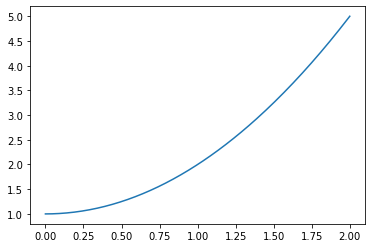

In [11]:
plt.plot(list_2, list_1)
plt.show()

### численное решение

In [12]:
matrix_1 = np.zeros((len(list_2)))
matrix_1[0] = 1
matrix_1[-1] = 5

### list_F = [-F(x,h) for x in list_2[1:-1]]
### list_a = [p(x-1/2*h)/h - h/6 * q(x-1/2*h) for x in list_2[1:-1]]
### list_b = [1/h * (p(x+1/2*h) + p(x-1/2*h)) + 1/3 * h *(q(x+1/2*h) + q(x-1/2*h)) for x in list_2[1:-1]]
### list_c = [p(x+1/2*h)/h - h/6 * q(x+1/2*h) for x in list_2[1:-1]]

In [13]:
list_F = []
for i in range(1,list_2.shape[0]-1):
    list_F.append(-F(list_2[i],list_h[i])) # это ок 
    
list_a = []
for i in range(1,list_2.shape[0]-1):
    delta_1 = list_2[i] - list_2[i-1]
    list_a.append(p(list_2[i]-1/2*list_h[i])/delta_1 - delta_1/6 * q(list_2[i]-1/2*list_h[i]))

list_b = []
for i in range(1,list_2.shape[0]-1):
    delta_1 = list_2[i] - list_2[i-1]
    delta_2 = list_2[i+1] - list_2[i]
    list_b.append(p(list_2[i]+1/2*list_h[i])/delta_2 + p(list_2[i]-1/2*list_h[i])/delta_1 + 1/3*(q(list_2[i]+1/2*list_h[i]) * delta_2 + delta_1*q(list_2[i]-1/2*list_h[i])))
    
list_c = [] 
for i in range(1,list_2.shape[0]-1):
    delta_2 = list_2[i+1] - list_2[i]
    list_c.append(p(list_2[i]+1/2*list_h[i])/delta_2 - delta_2/6 * q(list_2[i]+1/2*list_h[i]))

In [14]:
list_F_ans = list_F
list_F_ans[0] = list_F_ans[0] - list_a[0] * matrix_1[0]
list_F_ans[-1] = list_F_ans[-1] - matrix_1[-1] * list_c[-1]

In [15]:
matrix_g = np.zeros((len(list_2)-2, len(list_2)-2))

matrix_g[0][0] = -list_b[0]
matrix_g[0][1] = list_c[0]

for s in range(1,matrix_g.shape[0]):
    if s!=matrix_g.shape[0]-1:
        j = s
        matrix_g[s][j] = -list_b[s]
        matrix_g[s][j+1] = list_c[s]
        matrix_g[s][j-1] = list_a[s]
    
matrix_g[-1][-1] = -list_b[-1]
matrix_g[-1][-2] = list_a[-1]

In [16]:
m = np.linalg.solve(matrix_g, list_F_ans)
m = np.append(m,matrix_1[-1])
m = np.append(matrix_1[0],m)

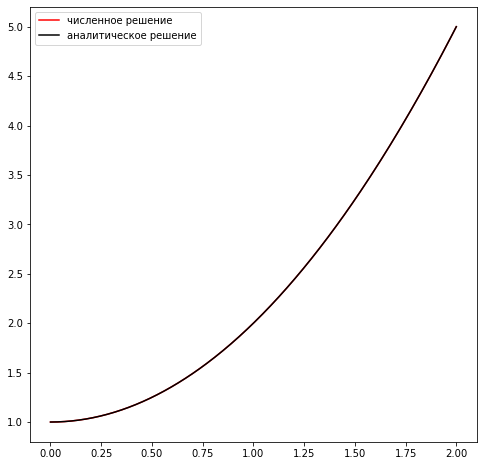

In [17]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8., 8.)
plt.plot(list_2,m, color = 'red',label='численное решение')
plt.plot(list_2, list_1,color = 'black', label='аналитическое решение')
plt.legend()
plt.show()